## Estudo de Proteção de Subestação de Medição e Proteção- Parte 2

### Executando a Parte 1

In [28]:
run Estudo_Proteção_IFTM_P1_R00.ipynb

O nível de Curto circuito é:  {'Icc3f': 1.619, 'Icc3fassim': 1.684, 'Icc2f': 1.402, 'Iccftmax': 1.169, 'Iccftmin': 183}
O valor da Impedância da rede é:  {'Z1': (1.4507+2.1381j), 'Z0': (1.807+5.3744j)}
O Ajuste do Religador é:  {'tipo': '351-R', 'rtc': 500, 'fase': {'pickup': 230, 'tap_inst': 895, 'curva': 'DEF_05'}, 'neutro': {'pickup': 25, 'tap_inst': 550}, 'religamentos': [5, 20, 40]}
O valor da Potência de base é:  100000000.0
O valor do Módulo da Impedância de base é:  1.9044
O valor da Corrente de base é:  (4183.697602823375+0j)
O valor da Impedância Positiva da rede é em pu:  (1.4507+2.1381j)
O valor da Impedância Zero da rede é em pu:  (1.807+5.3744j)
O valor da Resistência de falta é em ohm:  40
Transfomador 1 tem Potência de  360.0 kVA e Impedância Perccentual de  0.055 e fator k de  10
Transfomador 2 tem Potência de  225.0 kVA e Impedância Perccentual de  0.045 e fator k de  8
Impedância positiva do cabo em pu (1.675+0.3675j)
A Corrente Nominal no primário do Trafo 1 é:  (15

### Importando as variáveis da Parte 1

In [29]:
# Dados fornecidos
corrente_curto_trifasica = abs(I3ph)
corrente_curto_trifasica_assimetrica = abs(I3pha)
corrente_falta_fase_terra = abs(I1t)
corrente_falta_fase_terra_assimetrica = abs(I1ta)
corrente_falta_terra_minima = abs(I1tmin)
corrente_tc = abs(Intc_int1)

# Dados do relé
pickup_fase = rele["fase"]["pickup"]
pickup_neutro = rele["neutro"]["pickup"]

### Executando a verificação para as correntes de curto na barra média tensão da Subestação

In [30]:
run Verificar_Seletividade.py

In [31]:
verificar_seletividade(corrente_curto_trifasica, pickup_fase, corrente_curto_trifasica_assimetrica,
                       corrente_falta_fase_terra, pickup_neutro, corrente_tc, corrente_falta_terra_minima)

Verificações de Seletividade:
Corrente de curto trifásica (1044.36 A) > Pick-up de fase (230 A): Relé pode atuar.
Corrente de curto trifásica assimétrica (1044.77 A) > Pick-up de fase (230 A): Relé pode atuar.
Corrente de falta fase-terra (954.80 A) > Pick-up neutro (25 A): Relé pode atuar.
Corrente do TC (52.22 A) < Corrente mínima de falta terra (174.74 A): Seletividade mantida.


### Importando os ajustes de Proteção da Concessionária

In [32]:
# Ajustes da concessionária (valores de exemplo)
ajustes_concessionaria = {
    "pickup_fase": rele["fase"]["pickup"],  # 230 A
    "pickup_neutro": rele["neutro"]["pickup"],  # 25 A
    "tap_fase": rele["fase"]["tap_inst"],  # 895 A
    "tap_neutro": rele["neutro"]["tap_inst"],  # 550 A
}

### Primeiros dados de ajustes do Cliente importados da Parte 1

In [33]:
ajustes_rele_cliente = {
    "pickup_fase": abs(Ipf_inst), #58.57,  # em A
    "pickup_neutro": abs(Ipn),#5.86,  # em A
    "tap_fase": abs(Iif), #380,  # em A
    "tap_neutro": abs(Iin)#76.14,  # em A
}

### Executar o Ajustes de Rele

In [34]:
def ajustar_rele(ajustes_cliente, ajustes_concessionaria):
    ajustes_ajustados = {}
    
    for chave in ajustes_cliente:
        if ajustes_cliente[chave] < ajustes_concessionaria[chave]:
            ajustes_ajustados[chave] = ajustes_cliente[chave]
        else:
            # Ajusta para um valor que seja menor, por exemplo, 10% a menos
            ajustes_ajustados[chave] = ajustes_concessionaria[chave] * 0.9

    return ajustes_ajustados

# Calcular ajustes
ajustes_final = ajustar_rele(ajustes_rele_cliente, ajustes_concessionaria)

# Exibir ajustes
print("Ajustes do Relé da Concessionária:")
for chave, valor in ajustes_concessionaria.items():
    print(f"{chave}: {valor:.2f} A")

# Exibir ajustes
print("Ajustes do Relé do Cliente (ajustados para serem menores que os da concessionária):")
for chave, valor in ajustes_final.items():
    print(f"{chave}: {valor:.2f} A")

ajustar_rele(ajustes_rele_cliente, ajustes_concessionaria)

Ajustes do Relé da Concessionária:
pickup_fase: 230.00 A
pickup_neutro: 25.00 A
tap_fase: 895.00 A
tap_neutro: 550.00 A
Ajustes do Relé do Cliente (ajustados para serem menores que os da concessionária):
pickup_fase: 58.57 A
pickup_neutro: 5.86 A
tap_fase: 126.52 A
tap_neutro: 25.30 A


{'pickup_fase': 58.57176643952725,
 'pickup_neutro': 5.857176643952726,
 'tap_fase': 126.51501550937886,
 'tap_neutro': 25.303003101875774}

In [35]:
# Dados fornecidos (correntes em A e tempos em s)
correntes = [
    corrente_curto_trifasica,
    corrente_curto_trifasica_assimetrica,
    corrente_falta_fase_terra,
    corrente_falta_fase_terra_assimetrica,
    corrente_falta_terra_minima,
    corrente_tc,
    pickup_fase,
    pickup_neutro
]

In [36]:
run Tratamento_Plotagem.py

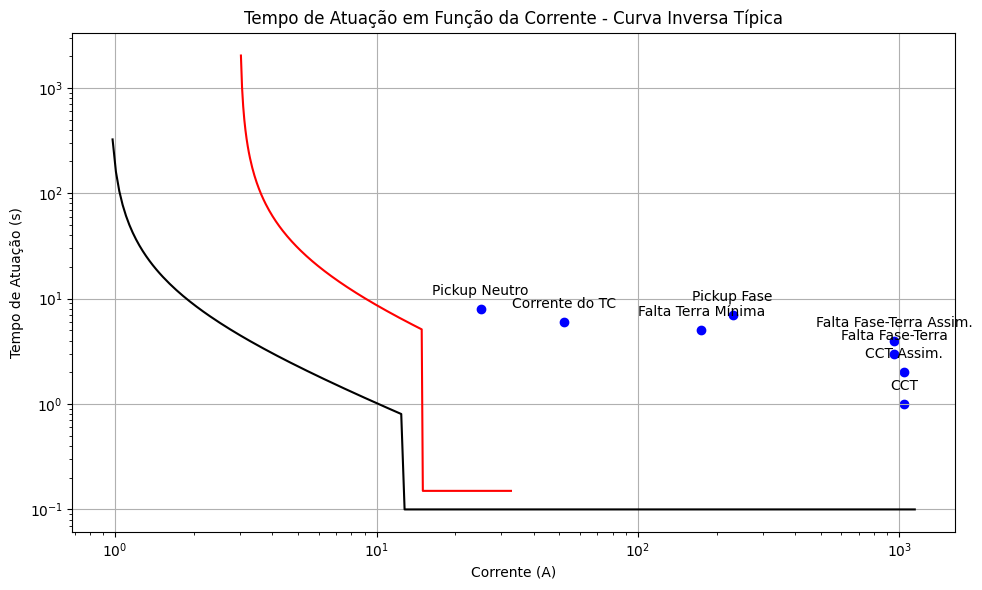

In [37]:
# Função para plotar gráfico de corrente vs. tempo de atuação
def plotar_graficos_corrente_tempo():
    plt.figure(figsize=(10, 6))
    
    # Gráfico
    plt.scatter(correntes, tempos_atuacao, color='blue')
    plt.plot(I_values_1, tempos_atuacao_1, marker='', linestyle='-', color='red')
    plt.plot(I_values_2, tempos_atuacao_2, marker='', linestyle='-', color='black')
    
    
    
    # Adicionando anotações para os pontos
    labels = ['CCT', 'CCT Assim.', 'Falta Fase-Terra', 'Falta Fase-Terra Assim.', 'Falta Terra Mínima', 'Corrente do TC', 'Pickup Fase', 'Pickup Neutro']
    for i, txt in enumerate(labels):
        plt.annotate(txt, (correntes[i], tempos_atuacao[i]), textcoords="offset points", xytext=(0,10), ha='center')

    
# Chama a função para plotar o gráfico
#plotar_graficos_corrente_tempo()

    # Gráfico
    
    # Configurações do gráfico
    plt.xscale('log')  # Eixo X 
    plt.yscale('log')  # Eixo Y 
    plt.xlabel('Corrente (A)')
    plt.ylabel('Tempo de Atuação (s)')
    plt.title('Tempo de Atuação em Função da Corrente - Curva Inversa Típica')
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Chama a função para plotar o gráfico
plotar_graficos_corrente_tempo()

